In [83]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import os
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [84]:

fermi_gbm_flare_list_csv = Path ('fermi_gbm_flare_list.csv')
fermi_gbm_flare_list = pd.read_csv(fermi_gbm_flare_list_csv, index_col="Date of Flare", parse_dates=True, infer_datetime_format=True)
fermi_gbm_flare_list.tail()

,Flare,Time,Peak,End,Dur,Peak.1,Total
Date of Flare,,,,,,,
2022-03-30,220330_1225,12:25:59,12:29:12,12:36:08,609,1850,420003
2022-03-30,220330_1356,13:56:25,13:58:24,13:59:34,188,3973,76700
2022-03-30,220330_1549,15:49:08,15:49:29,15:49:41,33,997,7024
2022-03-30,220330_1724,17:24:06,17:26:45,17:28:57,291,9031,269434
2022-03-30,220330_1805,18:05:40,18:43:21,18:52:18,2798,1700,516311


In [85]:
# Count nulls
scrubbed_data_csv = Path ('Scrubbed_data.csv')
scrubbed_data = pd.read_csv(scrubbed_data_csv, index_col="Date of Sighting", parse_dates=True, infer_datetime_format=True)
scrubbed_data.head()


,datetime,time,month,day,city,"location (land, in space, at sea, in flight)",state,country,country name,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
Date of Sighting,,,,,,,,,,,,,,,,
2005-04-10,4/10/05 22:52,22:52:00,Apr,Sunday,santa cruz,land,CA,US,United States of America (the),NaN,8.0,eight seconds,2 red lights moving together and apart with a ...,4/16/2005,36.974167,-122.029722
2000-02-02,2/2/00 19:33,19:33:00,Feb,Wednesday,bouse,land,AZ,US,United States of America (the),NaN,2.0,each a few seconds,Driving through Plomosa Pass towards Bouse Loo...,2/16/2000,33.932500,-114.005000
2006-07-21,7/21/2006 13:00,13:00:00,Jul,Friday,ibague (colombia),land,NaN,CO,Colombia,circle,0.5,1/2 segundo,Viajaba a 27.000 pies en un avion comercial ve...,10/30/2006,4.440663,-75.244141
1983-10-01,10/1/83 17:00,17:00:00,Oct,Saturday,birmingham (uk/england),land,NaN,GB,UK,sphere,97836000.0,31 years,Firstly&#44 I was stunned and stared at the ob...,4/12/13,52.466667,-1.916667
2010-06-03,6/3/10 23:30,23:30:00,Jun,Thursday,ottawa (canada),land,ON,CA,Cananda,other,82800000.0,23000hrs,((HOAX??)) I was out in a field near mil&#44 ...,7/6/10,45.416667,-75.700000


In [86]:
fermi_gbm_flare_list.dropna(inplace=True)
# fermi_gbm_flare_list.isnull().sum()
fermi_gbm_flare_list['fcount'] = 1
fermi_gbm_flare_list = fermi_gbm_flare_list.groupby(fermi_gbm_flare_list.index).sum('fcount')
fermi_gbm_flare_list = fermi_gbm_flare_list[['fcount']]

In [87]:
scrubbed_data_csv = Path ('Scrubbed_data.csv')
Alien_Sighting = pd.read_csv(scrubbed_data_csv, index_col="Date of Sighting", parse_dates=True, infer_datetime_format=True)
Alien_Sighting_cleaned = Alien_Sighting.loc[ (Alien_Sighting.index.year > 2008) & (Alien_Sighting.index.year < 2022),]
Alien_Sighting_cleaned['acount'] = 1
Alien_Sighting_cleaned=Alien_Sighting_cleaned.groupby(Alien_Sighting_cleaned.index).sum('acount')
Alien_Sighting_cleaned = Alien_Sighting_cleaned[['acount']]

/opt/anaconda3/envs/project1/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [88]:
joined_data = pd.concat([fermi_gbm_flare_list,Alien_Sighting_cleaned], axis= 0, join='outer')
# joined_data_2 = joined_data[['Flare','Time','Peak','End','Dur','Peak.1','Total']]
joined_data.sort_index().fillna(0)

,fcount,acount
2008-11-02,1.0,0.0
2008-12-11,1.0,0.0
2009-01-01,0.0,40.0
2009-01-02,0.0,12.0
2009-01-03,0.0,15.0
...,...,...
2022-03-24,1.0,0.0
2022-03-25,2.0,0.0
2022-03-28,10.0,0.0
2022-03-29,7.0,0.0


In [89]:
joined_data = joined_data.loc[ (joined_data.index.year < 2014),]
joined_data = joined_data.fillna(0)
joined_data

,fcount,acount
2008-11-02,1.0,0.0
2008-12-11,1.0,0.0
2009-07-06,1.0,0.0
2009-10-25,1.0,0.0
2009-10-26,1.0,0.0
...,...,...
2013-12-27,0.0,28.0
2013-12-28,0.0,30.0
2013-12-29,0.0,19.0
2013-12-30,0.0,12.0


<AxesSubplot:xlabel='index', ylabel='fcount'>

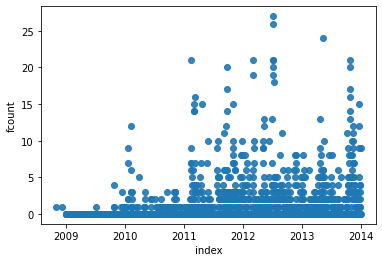

In [90]:
sns.regplot(x = "index", y="fcount", data=joined_data.reset_index(), fit_reg = False, scatter_kws={"alpha": 0.9})

<AxesSubplot:xlabel='index', ylabel='acount'>

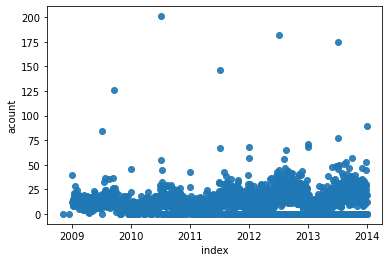

In [91]:
sns.regplot(x = "index", y="acount", data=joined_data.reset_index(), fit_reg = False, scatter_kws={"alpha": 0.9})

<AxesSubplot:ylabel='acount'>

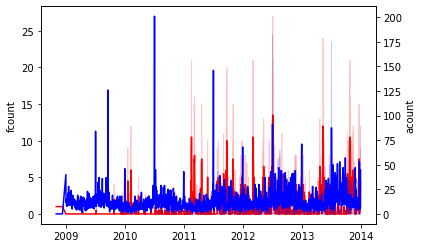

In [92]:
sns.lineplot(data=joined_data.fcount, color="r")
ax2 = plt.twinx()
sns.lineplot(data=joined_data.acount, color="b", ax=ax2)

In [93]:
correlation = joined_data.corr()
correlation

,fcount,acount
fcount,1.000000,-0.331295
acount,-0.331295,1.000000


<AxesSubplot:>

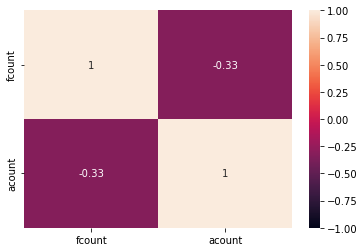

In [94]:
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

In [95]:
df_year = joined_data.reset_index()

In [96]:
df_year['year'] = pd.DatetimeIndex(df_year['index']).year
df_year=df_year.set_index('year')

<AxesSubplot:xlabel='year', ylabel='acount'>

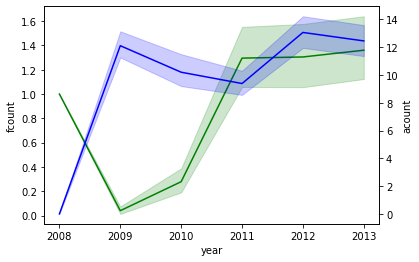

In [97]:
sns.lineplot(data=df_year.fcount, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_year.acount, color="b", ax=ax2)

In [98]:
correlation_year = df_year.corr()
correlation_year

,fcount,acount
fcount,1.000000,-0.331295
acount,-0.331295,1.000000


<AxesSubplot:>

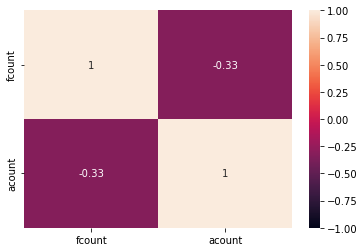

In [99]:
sns.heatmap(correlation_year,  vmin=-1, vmax=1,annot=True)

In [100]:
df_month = joined_data.reset_index()
df_month['month'] = pd.DatetimeIndex(df_month['index']).month
df_month=df_month.set_index('month')

<AxesSubplot:xlabel='month', ylabel='acount'>

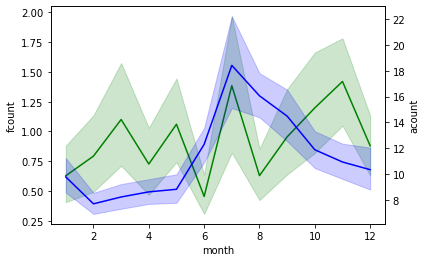

In [101]:
sns.lineplot(data=df_month.fcount, color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_month.acount, color="b", ax=ax2)

In [102]:
compared_data_csv = Path ('compared_data.csv')
compared_data = pd.read_csv(compared_data_csv, parse_dates=True, infer_datetime_format=True)
compared_data.reset_index

/opt/anaconda3/envs/project1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<bound method DataFrame.reset_index of       Date of Flare Date of Sighting Flare occur on date of sighting   \
0          2-Nov-08        01-Jan-08                               No   
1         11-Dec-08        02-Jan-08                               No   
2          6-Jul-09        03-Jan-08                               No   
3         25-Oct-09        04-Jan-08                               No   
4         26-Oct-09        05-Jan-08                               No   
...             ...              ...                              ...   
80326           NaN              NaN                              NaN   
80327           NaN              NaN                              NaN   
80328           NaN              NaN                              NaN   
80329           NaN              NaN                              NaN   
80330           NaN              NaN                              NaN   

       Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  
0   

In [109]:
compared_data_cleaned = compared_data.iloc[:,0:3]
compared_data_cleaned = compared_data_cleaned.dropna()
compared_data_cleaned.head(10)

,Date of Flare,Date of Sighting,Flare occur on date of sighting
0,2-Nov-08,01-Jan-08,No
1,11-Dec-08,02-Jan-08,No
2,6-Jul-09,03-Jan-08,No
3,25-Oct-09,04-Jan-08,No
4,26-Oct-09,05-Jan-08,No
5,27-Oct-09,06-Jan-08,No
6,10-Dec-09,07-Jan-08,No
7,16-Dec-09,08-Jan-08,No
8,18-Dec-09,09-Jan-08,No
9,19-Dec-09,10-Jan-08,No


In [111]:
compared_data_cleaned

,Date of Flare,Date of Sighting,Flare occur on date of sighting
0,2-Nov-08,01-Jan-08,No
1,11-Dec-08,02-Jan-08,No
2,6-Jul-09,03-Jan-08,No
3,25-Oct-09,04-Jan-08,No
4,26-Oct-09,05-Jan-08,No
...,...,...,...
915,26-Dec-14,04-Nov-14,Yes
916,27-Dec-14,01-Dec-14,Yes
917,28-Dec-14,02-Dec-14,Yes
918,30-Dec-14,03-Dec-14,Yes


In [112]:
print(compared_data_cleaned.columns)

Index(['Date of Flare', 'Date of Sighting',
       'Flare occur on date of sighting '],
      dtype='object')


In [113]:
print(compared_data_cleaned['Flare occur on date of sighting '].value_counts()['Yes'])

315


In [116]:
print(compared_data_cleaned['Flare occur on date of sighting '].value_counts()['No'])

605


<AxesSubplot:>

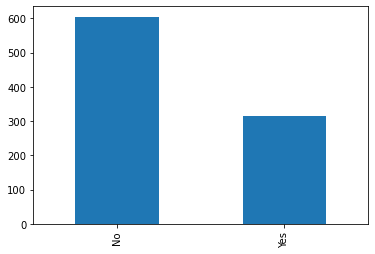

In [132]:
compared_data_cleaned['Flare occur on date of sighting '].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='Flare occur on date of sighting '>

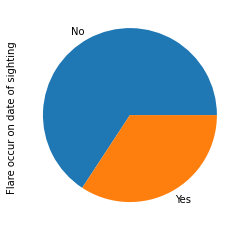

In [130]:
compared_data_cleaned['Flare occur on date of sighting '].value_counts().plot(kind='pie')

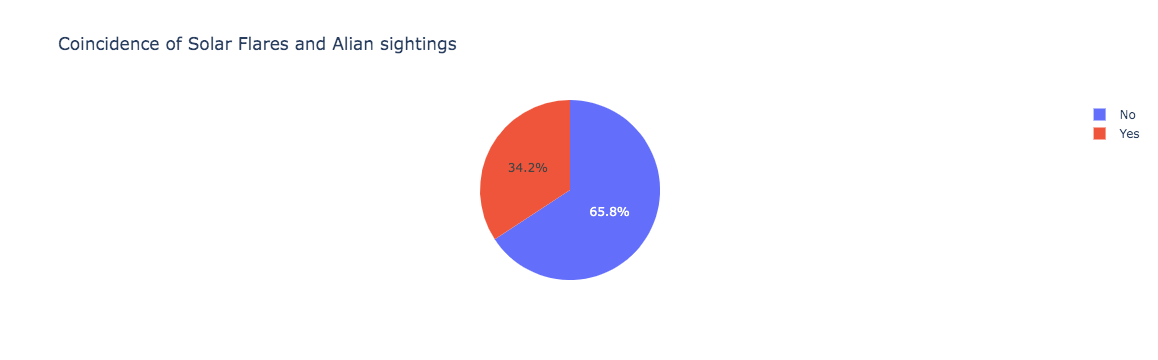

In [147]:

fig = px.pie(compared_data_cleaned, names='Flare occur on date of sighting ', title = 'Coincidence of Solar Flares and Alian sightings' )
fig.show()

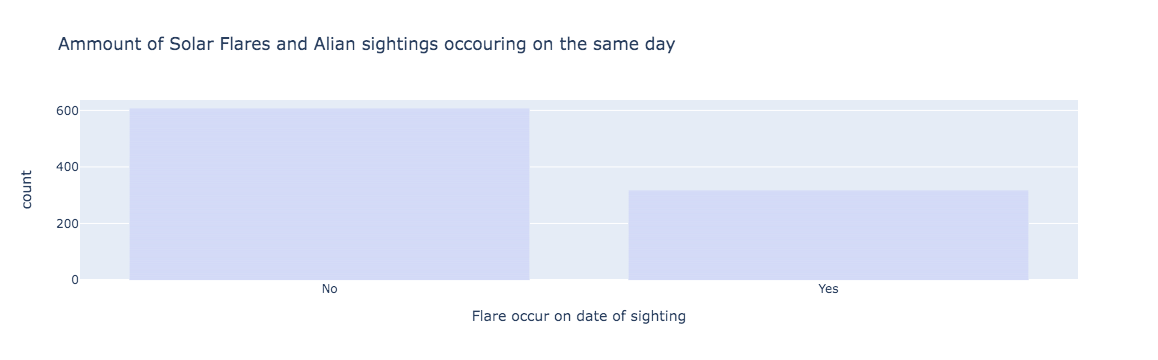

In [150]:
fig2 = px.bar(compared_data_cleaned,'Flare occur on date of sighting ', title = 'Ammount of Solar Flares and Alian sightings occouring on the same day')
fig2.show()